<a href="https://colab.research.google.com/github/khm9309/A/blob/main/Bus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# 한글 깨짐 -> 폰트 다운
#실행한후 위의 런타임 다시시작을 눌러주어야 한다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [1]:
#폰트 설치된 갯수 확인
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
print(f"Sys_font Number: {len(sys_font)}")
#print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"Nanum_font Number: {len(nanum_font)}")
print(nanum_font)

Sys_font Number: 48
Nanum_font Number: 31
['/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/Nanum

In [2]:
import seaborn as sb
sb.set(font="NanumGothic")
#sb.set(font="AppleGothic") #애플은 다음과 같이 작성

In [3]:
#한글처리 2
from matplotlib import font_manager,rc
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

In [4]:
# matplotlib : 데이터를 다양한 그래프로 만들어주는 파이썬 라이브러리
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [43]:
!pip show plotnine
!pip show missingno
!pip install xmltodict
# 지도 관련 라이브러리
!pip install folium
!pip install pyproj
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
from plotnine import *
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

Name: plotnine
Version: 0.10.1
Summary: A grammar of graphics for python
Home-page: https://plotnine.readthedocs.io/en/stable
Author: Hassan Kibirige
Author-email: has2k1@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, mizani, numpy, pandas, patsy, scipy, statsmodels
Required-by: 
Name: missingno
Version: 0.5.2
Summary: Missing data visualization module for Python.
Home-page: https://github.com/ResidentMario/missingno
Author: Aleksey Bilogur
Author-email: aleksey.bilogur@gmail.com
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, scipy, seaborn
Required-by: 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
pre_sale = pd.read_excel('/content/서울시버스노선ID정보(20230509).xlsx')
pre_sale.describe

pre_sale.head()
pre_sale.tail()

,노선명,ROUTEID
668,종로12,100900009
669,종로13,100900002
670,중랑01,106900001
671,중랑02,106900002
672,청와대A01(자율주행),100000020


In [122]:
import pandas as pd

def get_routeid_by_route_name(pre_sale, route_name):
    row = pre_sale[pre_sale['노선명'] == route_name]
    if len(row) > 0:
        return row['ROUTEID'].values[0]
    else:
        return None

# 엑셀 파일 읽기
pre_sale = pd.read_excel('/content/서울시버스노선ID정보(20230509).xlsx')

# describe 출력
print(pre_sale.describe())

# head 출력
print(pre_sale.head())

# tail 출력
print(pre_sale.tail())

# 노선명으로 routeid 조회
bus_name = input("버스 이름을 입력하세요: ")
route_id = get_routeid_by_route_name(pre_sale, bus_name)
if route_id is not None:
    print(f"{bus_name}의 routeid는 {route_id}입니다.")
else:
    print(f"{bus_name}에 해당하는 노선이 없습니다. 띄어쓰기를 조심하세요.")

            ROUTEID
count  6.730000e+02
mean   1.063832e+08
std    8.099743e+06
min    1.000000e+08
25%    1.001002e+08
50%    1.001006e+08
75%    1.129000e+08
max    1.249000e+08
    노선명    ROUTEID
0  0017  100100124
1    01  100100001
2  0411  104000012
3   100  100100549
4   101  100100006
              노선명    ROUTEID
668          종로12  100900009
669          종로13  100900002
670          중랑01  106900001
671          중랑02  106900002
672  청와대A01(자율주행)  100000020
버스 이름을 입력하세요: 160
160의 routeid는 100100033입니다.


In [124]:
#xml 을 json 으로 저장하고 df에 정보 저장
import requests
import xmltodict
import pandas as pd
from pandas import json_normalize

url = 'http://ws.bus.go.kr/api/rest/arrive/getArrInfoByRouteAll'
params = {'serviceKey': 'dGMBXjnE5WYim8sdQHMPL7NuiPchOxiauJ0iKPQz5YM5XYHdLj3VBCtLPOukMnfx16JEM4J6Gs8RyTVyhrd7OQ==', 'busRouteId': route_id}

response = requests.get(url, params=params)
xml_data = response.content.decode('utf-8')  # 바이너리 데이터를 문자열로 디코딩
json_data = xmltodict.parse(xml_data)
df = json_normalize(json_data['ServiceResult']['msgBody']['itemList'])
#엑셀에 df 저장
df.to_excel(excel_writer="bus.xlsx") 
#df

In [5]:
import pandas as pd

df = pd.read_excel('/content/bus.xlsx')
df

,Unnamed: 0,arrmsg1,arrmsg2,arsId,avgCf1,avgCf2,brdrde_Num1,brdrde_Num2,brerde_Div1,brerde_Div2,...,term,traSpd1,traSpd2,traTime1,traTime2,vehId1,vehId2,stationNm1,repTm1,stationNm2
0,0,출발대기,출발대기,10340,0,0,0,0,0,0,...,8,0,0,0,0,0,0,NaN,NaN,NaN
1,1,출발대기,출발대기,10001,0,0,0,0,0,0,...,8,0,0,0,0,0,0,NaN,NaN,NaN
2,2,곧 도착,출발대기,10003,0,0,0,0,0,0,...,8,63,0,32,0,109059259,0,도봉한신아파트,NaN,NaN
3,3,2분42초후[1번째 전],출발대기,10005,0,0,0,0,0,0,...,8,28,0,162,0,109059259,0,도봉한신아파트,NaN,NaN
4,4,3분50초후[2번째 전],출발대기,10007,0,0,0,0,0,0,...,8,27,0,230,0,109059259,0,도봉한신아파트,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,2분후[2번째 전],14분4초후[7번째 전],10006,0,0,4,0,4,0,...,8,27,19,175,844,109059096,109059244,신도봉시장.도봉구청.방학북부역,2021-12-26 20:06:11.0,우이1교앞
116,116,4분59초후[3번째 전],16분8초후[8번째 전],10004,0,0,4,0,4,0,...,8,23,19,299,968,109059096,109059244,신도봉시장.도봉구청.방학북부역,2021-12-26 20:06:11.0,우이1교앞
117,117,곧 도착,6분52초후[4번째 전],10002,0,0,4,0,4,0,...,8,52,23,46,412,109059194,109059096,도봉산역,2021-12-26 20:06:11.0,신도봉시장.도봉구청.방학북부역
118,118,2분18초후[1번째 전],8분24초후[5번째 전],10341,0,0,4,0,4,0,...,8,28,21,138,504,109059194,109059096,도봉산역,NaN,신도봉시장.도봉구청.방학북부역


In [11]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 122561 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [14]:
!fc-cache -fv

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

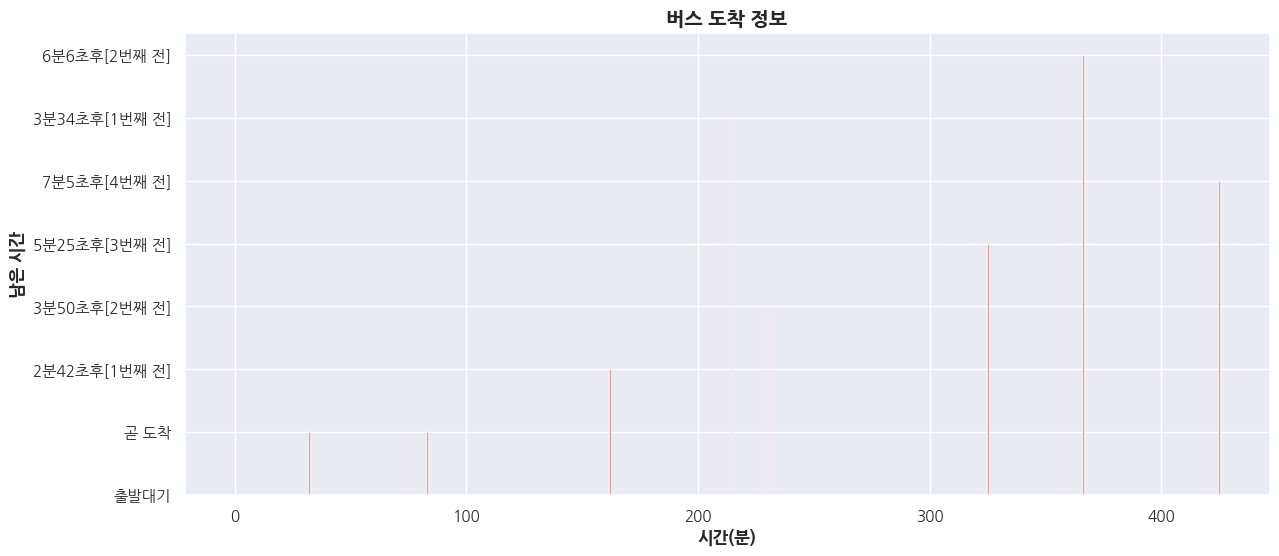

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

df['traTime1'] = pd.to_numeric(df['traTime1'].head(10))
df['arrmsg1'] = df['arrmsg1'].astype(str)

fig = plt.figure(figsize=(14,6))
ax = plt.subplot(1,1,1)

ax.bar(df['traTime1'], df['arrmsg1'], color='r', alpha=0.7)
ax.set_xlabel('시간(분)', fontweight='bold', fontsize=12)
ax.set_ylabel('남은 시간', fontweight='bold', fontsize=12)
ax.set_title('버스 도착 정보', fontweight='bold', fontsize=14)

plt.show()


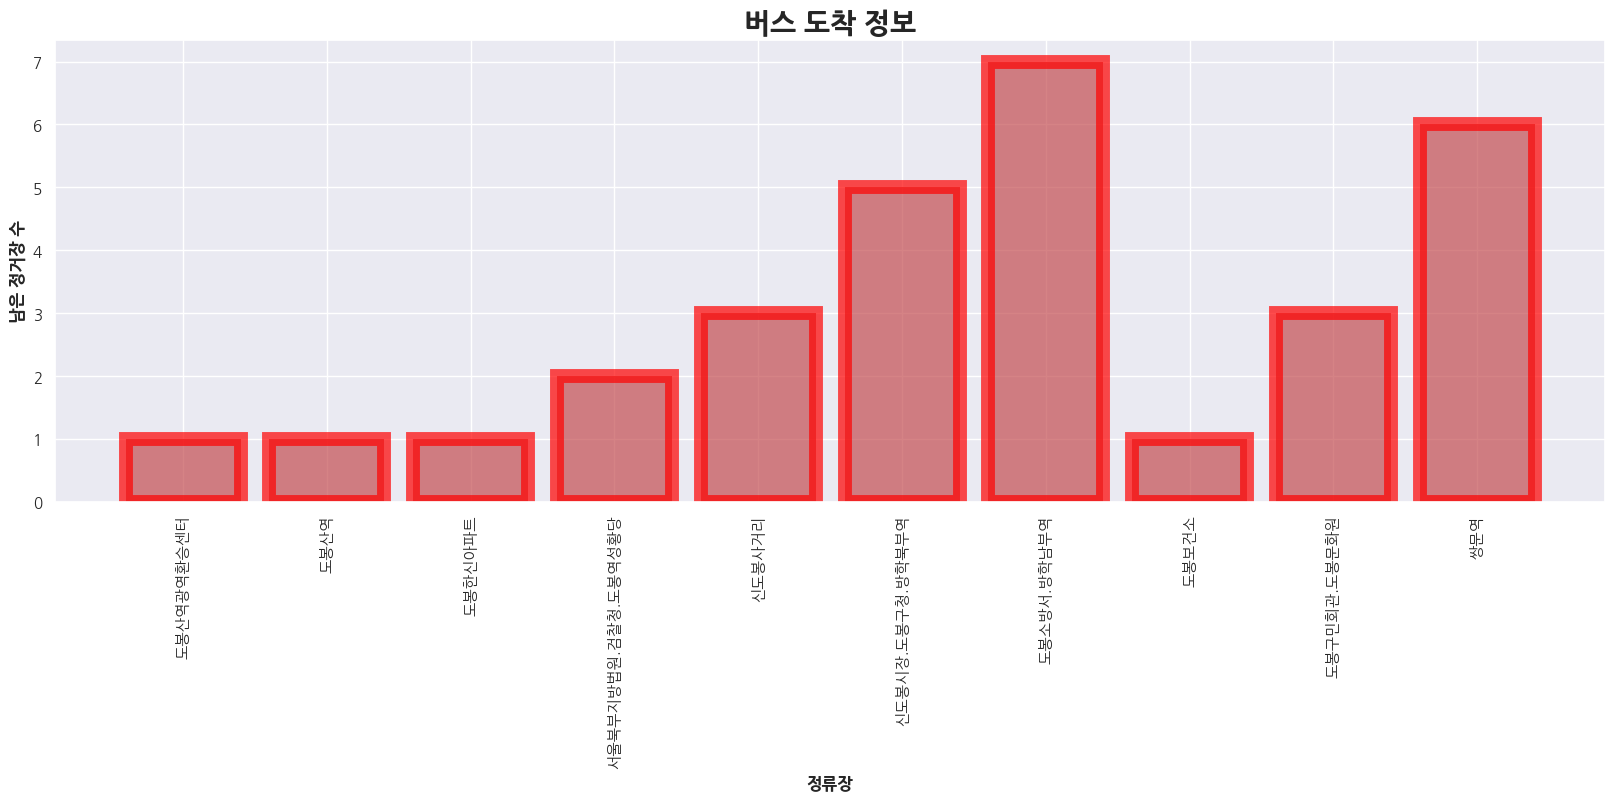

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

df['stNm'] = df['stNm'].astype(str)
df['arrmsg1'] = df['arrmsg1'].astype(str)
# arrmsg1 열의 값을 처음 10개로 제한
df = df.head(10)
fig = plt.figure(figsize=(20,6))
ax = plt.subplot(1,1,1)
# 첫 번째 문자가 숫자인지 확인하여 y 좌표 설정
y_positions = [float(arrmsg[0]) if arrmsg[0].isdigit() else 1 for arrmsg in df['arrmsg1']]
ax.bar(df['stNm'], y_positions, color='r', edgecolor='red', alpha=0.7, linewidth=10)
ax.set_xlabel('정류장', fontweight='bold', fontsize=12)
ax.set_ylabel('남은 정거장 수', fontweight='bold', fontsize=12)
ax.set_title('버스 도착 정보', fontweight='bold', fontsize=20)
plt.xticks(rotation=90)
plt.show()


In [125]:
#연습
def get_arrmsg_by_index(index):
    if index >= 1 and index <= len(df):
        selected_row = df.iloc[index-1]        
        stNm = selected_row['stNm']
        arrmsg1 = selected_row['arrmsg1']
        arrmsg2 = selected_row['arrmsg2']
        a = arrmsg1.split('[')
        print(a)

        print(f"버스: {bus_name}")
        print(f"정거장: {stNm}")
        print(f"1: {arrmsg1}")
        print(f"2: {arrmsg2}")
    else:
        print("존재하지 않습니다.")

index = int(input("궁금한 정거장 번호를 입력해주세요.: "))
get_arrmsg_by_index(index)

궁금한 정거장 번호를 입력해주세요.: 13
['2분12초후', '0번째 전]']
버스: 160
정거장: 수유(강북구청)역
1: 2분12초후[0번째 전]
2: 12분9초후[5번째 전]


In [141]:
#while문을 넣어 계속 검색가능하도록 함
while True:
    print('버스 : ' + bus_name)
    print()
    for i, value in enumerate(df['stNm'], 1):
        print(f"{i}. {value}")

    index = int(input("궁금한 정거장 번호를 입력해주세요. (종료: 0): "))
    if index == 0:
        break

    def get_arrmsg_by_index(index):
        if index >= 1 and index <= len(df):
            selected_row = df.iloc[index-1]
            stNm = selected_row['stNm']
            global station
            station = stNm
            arrmsg1 = selected_row['arrmsg1']
            arrmsg2 = selected_row['arrmsg2']
            print(f"버스: {bus_name}")
            print(f"정거장: {stNm}")
            print(f"1: {arrmsg1}")
            print(f"2: {arrmsg2}")
        else:
            print("존재하지 않습니다.")

    get_arrmsg_by_index(index)
    print()

버스 : 160

1. 도봉산역광역환승센터
2. 도봉산역
3. 도봉한신아파트
4. 서울북부지방법원.검찰청.도봉역성황당
5. 신도봉사거리
6. 신도봉시장.도봉구청.방학북부역
7. 도봉소방서.방학남부역
8. 도봉보건소
9. 도봉구민회관.도봉문화원
10. 쌍문역
11. 우이1교앞
12. 수유3동우체국
13. 수유(강북구청)역
14. 수유역
15. 수유시장.성신여대미아캠퍼스앞
16. 미아역.신일중고
17. 도봉세무서.성북시장
18. 미아사거리역
19. 월곡뉴타운
20. 길음뉴타운
21. 미아리고개.미아리예술극장
22. 돈암사거리.성신여대입구
23. 삼선교.한성대학교
24. 혜화동로터리.여운형활동터
25. 명륜3가.성대입구
26. 창경궁.서울대학교병원
27. 원남동
28. 종로4가.종묘
29. 종로3가.탑골공원
30. 종로2가
31. 종로1가
32. 광화문
33. 서울역사박물관.경희궁앞
34. 서대문역사거리
35. 충정로역
36. 아현초등학교
37. 마포경찰서
38. 아현동주민센터
39. 공덕역
40. 마포역
41. 여의도환승센터
42. 여의도공원
43. 영등포역
44. 남부지방법원등기국.구로세무서(에이스하이테크시티)
45. 문래동남성아파트
46. 신도림역
47. 신도림동.구로역
48. 구일역.중앙유통상가
49. 동양미래대학.구로성심병원
50. 개봉역.영화아파트
51. 경인중학교.개봉사거리
52. 오류1동주민센터.오류문화센터
53. 오류동역
54. 오류지구대.신오류주유소
55. 연세중앙교회
56. 궁동청소년문화의집
57. 우신고등학교
58. 온수역
59. 온수동종점
60. 온수역
61. 우신고등학교
62. 궁동청소년문화의집.구로검사소
63. 연세중앙교회
64. 씨티월드
65. 오류동역
66. 오류1동주민센터.오류문화센터
67. 경인중학교.개봉사거리
68. 개봉역.한마을아파트
69. 동양미래대학.구로성심병원
70. 구일역.제일제당
71. 신도림동.구로역
72. 신도림역
73. 문래동남성아파트
74. 남부지방법원등기국.구로세무서(에이스하이테크시티)
75. 영등포역
76. 

In [143]:
print('버스 : ' + bus_name)
print()
for i, value in enumerate(df['stNm'], 1):
    print(f"{i}. {value}")

index = int(input("궁금한 정거장 번호를 입력해주세요. (종료: 0): "))
if index != 0:
    def get_arrmsg_by_index(index):
        if index >= 1 and index <= len(df):
            selected_row = df.iloc[index-1]
            stNm = selected_row['stNm']
            global station
            station = stNm
            arrmsg1 = selected_row['arrmsg1']
            arrmsg2 = selected_row['arrmsg2']
            print(f"버스: {bus_name}")
            print(f"정거장: {stNm}")
            print(f"1: {arrmsg1}")
            print(f"2: {arrmsg2}")
        else:
            print("존재하지 않습니다.")

    get_arrmsg_by_index(index)
    print()

버스 : 160

1. 도봉산역광역환승센터
2. 도봉산역
3. 도봉한신아파트
4. 서울북부지방법원.검찰청.도봉역성황당
5. 신도봉사거리
6. 신도봉시장.도봉구청.방학북부역
7. 도봉소방서.방학남부역
8. 도봉보건소
9. 도봉구민회관.도봉문화원
10. 쌍문역
11. 우이1교앞
12. 수유3동우체국
13. 수유(강북구청)역
14. 수유역
15. 수유시장.성신여대미아캠퍼스앞
16. 미아역.신일중고
17. 도봉세무서.성북시장
18. 미아사거리역
19. 월곡뉴타운
20. 길음뉴타운
21. 미아리고개.미아리예술극장
22. 돈암사거리.성신여대입구
23. 삼선교.한성대학교
24. 혜화동로터리.여운형활동터
25. 명륜3가.성대입구
26. 창경궁.서울대학교병원
27. 원남동
28. 종로4가.종묘
29. 종로3가.탑골공원
30. 종로2가
31. 종로1가
32. 광화문
33. 서울역사박물관.경희궁앞
34. 서대문역사거리
35. 충정로역
36. 아현초등학교
37. 마포경찰서
38. 아현동주민센터
39. 공덕역
40. 마포역
41. 여의도환승센터
42. 여의도공원
43. 영등포역
44. 남부지방법원등기국.구로세무서(에이스하이테크시티)
45. 문래동남성아파트
46. 신도림역
47. 신도림동.구로역
48. 구일역.중앙유통상가
49. 동양미래대학.구로성심병원
50. 개봉역.영화아파트
51. 경인중학교.개봉사거리
52. 오류1동주민센터.오류문화센터
53. 오류동역
54. 오류지구대.신오류주유소
55. 연세중앙교회
56. 궁동청소년문화의집
57. 우신고등학교
58. 온수역
59. 온수동종점
60. 온수역
61. 우신고등학교
62. 궁동청소년문화의집.구로검사소
63. 연세중앙교회
64. 씨티월드
65. 오류동역
66. 오류1동주민센터.오류문화센터
67. 경인중학교.개봉사거리
68. 개봉역.한마을아파트
69. 동양미래대학.구로성심병원
70. 구일역.제일제당
71. 신도림동.구로역
72. 신도림역
73. 문래동남성아파트
74. 남부지방법원등기국.구로세무서(에이스하이테크시티)
75. 영등포역
76. 

## 버스 위치 정보 가져오기

In [127]:
#xml 을 json 으로 저장하고 daf에 정보 저장
import requests
import xmltodict
import pandas as pd
from pandas import json_normalize

url = 'http://ws.bus.go.kr/api/rest/buspos/getBusPosByRouteSt'
params ={'serviceKey' : 'dGMBXjnE5WYim8sdQHMPL7NuiPchOxiauJ0iKPQz5YM5XYHdLj3VBCtLPOukMnfx16JEM4J6Gs8RyTVyhrd7OQ==', 'busRouteId' : route_id, 'startOrd' : '1', 'endOrd' : '10' }

res = requests.get(url, params=params)
xml_data = res.content.decode('utf-8')  # 바이너리 데이터를 문자열로 디코딩
json_data = xmltodict.parse(xml_data)
daf = json_normalize(json_data['ServiceResult']['msgBody']['itemList'])

for i, row in daf.iterrows():
    tmX_value = row['tmX']
    tmY_value = row['tmY']
    
    # 변수 이름 생성
    tmX_variable_name = f"tmX_{i+1}"
    tmY_variable_name = f"tmY_{i+1}"
    
    # 변수에 값 저장
    globals()[tmX_variable_name] = tmX_value
    globals()[tmY_variable_name] = tmY_value
    
    # 출력
    print(f"{tmX_variable_name}: {tmX_value}")
    print(f"{tmY_variable_name}: {tmY_value}")
    print("--------------------")

tmX_1: 127.045798
tmY_1: 37.687334
--------------------
tmX_2: 127.042432
tmY_2: 37.663016
--------------------


In [144]:
print(station)

수유(강북구청)역


In [157]:
import folium
import pandas as pd

# 엑셀 파일 경로
excel_file = '/서울시버스정류소위치정보(20230509).xlsx'

# 정류소 명과 일치할 정류소명
target_stNm = '일치하는 정류소명'

# 엑셀 파일 읽기
dtf = pd.read_excel(excel_file)

# 정류소 명과 일치하는 행 찾기
matching_row = dtf[dtf['정류소명'] == station]
if not matching_row.empty:
    # X좌표와 Y좌표 가져오기
    global x_coord,y_coord
    x_coord = matching_row['X좌표'].values[0]
    y_coord = matching_row['Y좌표'].values[0]
    # 변수 출력
    print(f"X좌표: {x_coord}")
    print(f"Y좌표: {y_coord}")

    # 지도 생성
    map = folium.Map(location=[x_coord, y_coord], zoom_start=15)

    # 정류소 아이콘 추가
    folium.Marker([x_coord, y_coord], icon=folium.Icon(icon='bus')).add_to(map)

    # 지도 출력
    map
else:
    print(f"일치하는 정류소명이 없습니다.")

X좌표: 127.0261000734
Y좌표: 37.6384770489



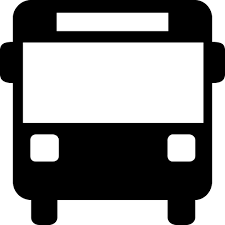
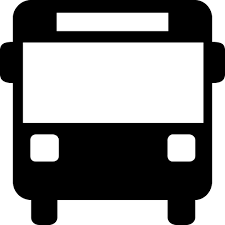
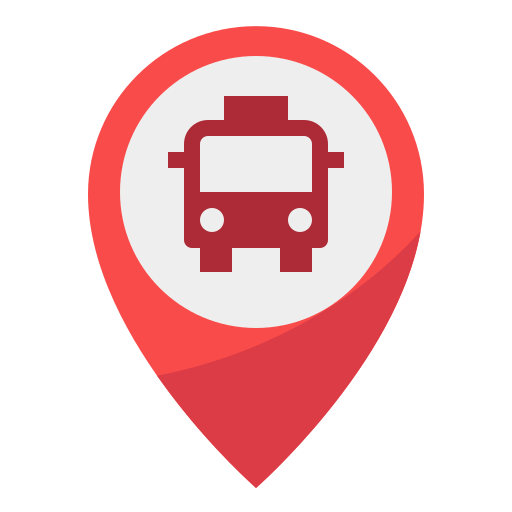
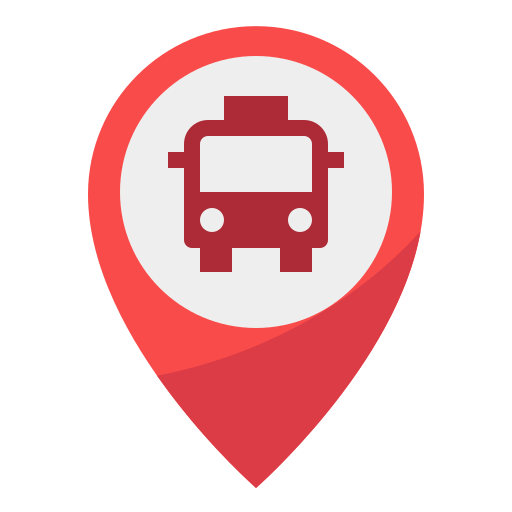

In [167]:
import folium

# 버스 아이콘 이미지 경로
bus_icon_path = '/bus_icon.png'
station_icon_path = '/station_icon.png'

# 지도 생성
map = folium.Map(location=[37.5, 127.0], zoom_start=12)  # 초기 지도 중심 위치와 확대/축소 정도를 설정합니다.

# tmX와 tmY 값을 이용하여 버스 모양 이미지 마커를 생성하고, 지도에 추가합니다.
for i, row in daf.iterrows():
    tmX_value = row['tmX']
    tmY_value = row['tmY']
    
    # 버스 모양 이미지 마커 생성
    bus_icon = folium.CustomIcon(
        icon_image=bus_icon_path,
        icon_size=(30, 30)
    )
    folium.Marker(
        location=[tmY_value, tmX_value],
        icon=bus_icon,
        popup= "버스 : " + bus_name + f" {i+1}번째"
    ).add_to(map)

for i, row in daf.iterrows():
    # 이미지 마커 생성
    station_icon = folium.CustomIcon(
        icon_image=station_icon_path,
        icon_size=(50, 50)
    )
    folium.Marker(
        location=[y_coord, x_coord],
        icon=station_icon,
        popup=f"정류장 : {station}"
    ).add_to(map)    

# 지도 출력
map
